<a href="https://colab.research.google.com/github/mahdid-lilia/SIC_Samsung-Innovation-Campus-AI-Course/blob/main/DL4_HappyHouse/%20ToDo_CP_Happy_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [52]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("/content/drive/MyDrive/happy-house-dataset/train_happy.h5","/content/drive/MyDrive/happy-house-dataset/test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


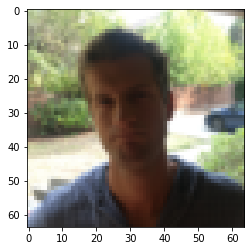

In [6]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [36]:

model = Sequential()
# add Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                  input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())
# Densely connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [38]:
history_model = model.fit(X_train,Y_train, epochs=40, batch_size=64)

Epoch 1/40
10/10 [==============================] - 5s 452ms/step - loss: 0.6918 - accuracy: 0.5250
Epoch 2/40
10/10 [==============================] - 5s 451ms/step - loss: 0.6938 - accuracy: 0.4917
Epoch 3/40
10/10 [==============================] - 5s 448ms/step - loss: 0.6878 - accuracy: 0.5533
Epoch 4/40
10/10 [==============================] - 5s 449ms/step - loss: 0.6616 - accuracy: 0.6567
Epoch 5/40
10/10 [==============================] - 5s 450ms/step - loss: 0.6154 - accuracy: 0.6817
Epoch 6/40
10/10 [==============================] - 5s 454ms/step - loss: 0.4875 - accuracy: 0.7683
Epoch 7/40
10/10 [==============================] - 5s 453ms/step - loss: 0.3873 - accuracy: 0.8283
Epoch 8/40
10/10 [==============================] - 5s 457ms/step - loss: 0.2674 - accuracy: 0.8850
Epoch 9/40
10/10 [==============================] - 5s 457ms/step - loss: 0.2077 - accuracy: 0.9200
Epoch 10/40
10/10 [==============================] - 5s 541ms/step - loss: 0.2017 - accuracy: 0.9183

# Evaluate / Test

In [39]:
model.metrics_names

['loss', 'accuracy']

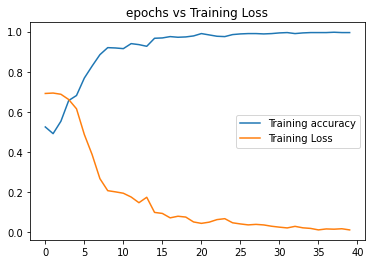

In [40]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [53]:
# Code Here
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

5/5 [==============================] - 0s 72ms/step - loss: 0.0978 - accuracy: 0.9600
Test loss: 0.0978 accuracy: 0.9600


Confusion Matrix

5/5 [==============================] - 1s 112ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


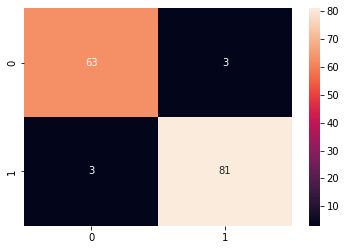

In [58]:
# Code Here
y_pred = model.predict(X_test)
y_pred_logical = (y_pred > 0.5).astype(np.int)
cm = confusion_matrix(Y_test, y_pred_logical)
sns.heatmap(cm, annot = True)

# Note

Before you submit your work 

* You should compare different optimizers


              Optimizers that I tried: adam, sgd, Adadelta, Adagrad, Adamax, Nadam and the best one I found is adam. 

---

* Display images with Predicted & expected labels (Happy-sad)


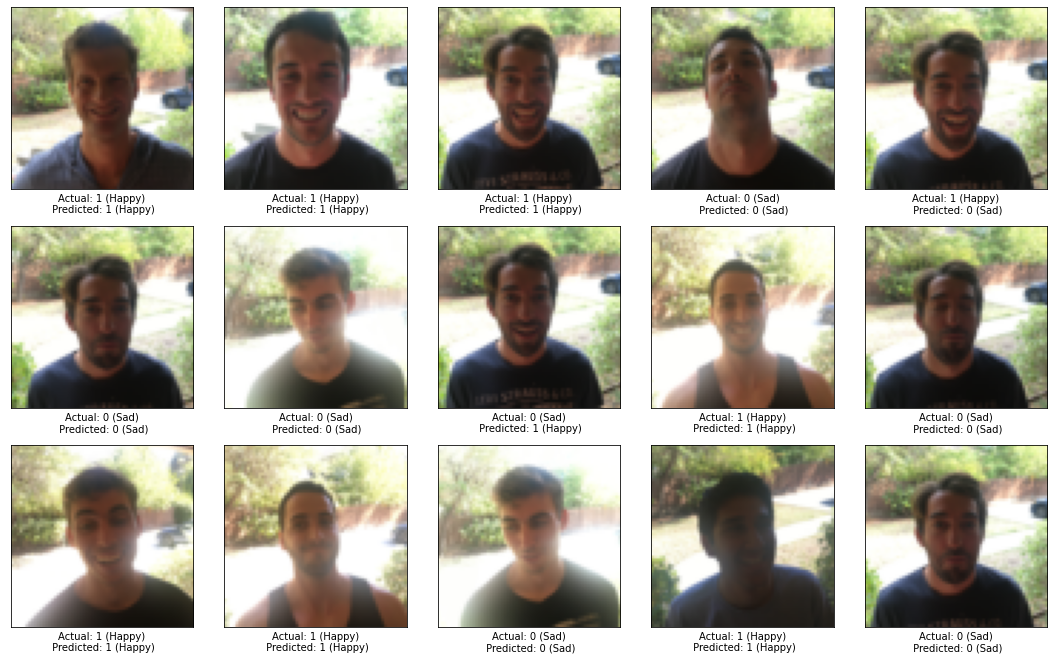

In [59]:
plt.figure(figsize=(15,15))
text_labels = ["Sad", "Happy"]
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 150)
    plt.imshow(X_test_orig[img_index], cmap=plt.cm.gray)
    actual_label  = Y_test[img_index][0]
    predicted_label = int(y_pred_logical[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()